In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

http://127.0.0.1:8888/tree?token=e4faf50932b072882cf7aded59de99d00295dd97a812aa58

### Loading the dataset

In [2]:
(x_train , y_train ), (x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### setting the layers for CNN


In [5]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

### Model Building

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,  epochs=5)


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1510 - accuracy: 0.9531
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0482 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0223 - accuracy: 0.9927


### Evaluation

In [7]:
loss,accuracy = model.evaluate(x_test,y_test)
print("test loss:",loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9851
test loss: 0.0466814860701561


In [8]:
print("Test Accuracy",accuracy)

Test Accuracy 0.9850999712944031


### Testing

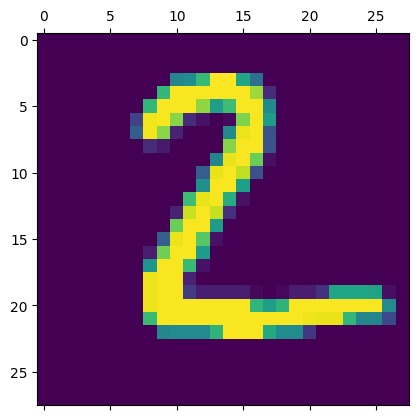

In [9]:
plt.matshow(x_test[1])


In [10]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [11]:
np.argmax(y_pred[1])

2

### Saving the Model

In [12]:
model.save("/home/ubuntu/T190242031")

INFO:tensorflow:Assets written to: /home/ubuntu/T190242031/assets


INFO:tensorflow:Assets written to: /home/ubuntu/T190242031/assets


In [17]:
from tensorflow import keras
model = keras.models.load_model("/home/ubuntu/T190242031")

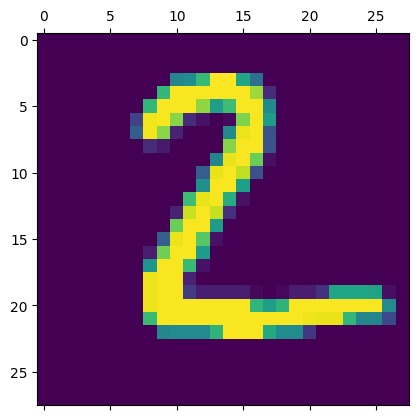

In [23]:
plt.matshow(x_test[1])

In [21]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
np.argmax(y_pred[1])

2